# Advanced Regression Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Steps taken:

Data reading and understanding
Data cleaning
Eda
Data preparation
Model building and evaluation

## Data Reading & Understanding

In [1]:
# import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
#read csv file

data=pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check shape

data.shape

(1460, 81)

**81 cols are present**

In [5]:
# check summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# check the numeric values 

data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

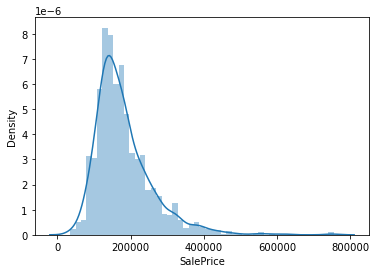

In [7]:
sns.distplot(data['SalePrice'])

In [8]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [9]:
# check for null values

data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
#check percentage of missing values

round((data.isnull().mean()*100).sort_values(ascending=False),2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

### Note: As seen in the data dictionary some of these columns with missing values have a value NA
### Let's not drop these columns but replace the missing values with None 

In [11]:
# check missing values columns with common NA values which means unavailability of the facility

cols_with_NA = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual',
               'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1']

for i in cols_with_NA:
    data[i].fillna("None", inplace=True)

In [12]:
round((data.isnull().mean()*100).sort_values(ascending=False),2)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
KitchenQual       0.00
GarageType        0.00
FireplaceQu       0.00
Fireplaces        0.00
Functional        0.00
TotRmsAbvGrd      0.00
Id                0.00
GarageFinish      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
KitchenAbvGr      0.00
GarageCars        0.00
GarageArea        0.00
PoolQC            0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
MiscFeature       0.00
Fence             0.00
PoolArea          0.00
GarageQual        0.00
ScreenPorch       0.00
3SsnPorch         0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageCond        0.00
1stFlrSF          0.00
HeatingQC         0.00
CentralAir 

### Checking numerical values now

In [13]:
# checking the dictionary we see that MasVnrType has a None value in it , so let's replace it with that

data['MasVnrType'].fillna('None' ,inplace=True)

In [14]:
# no we replace the other missing values with it's median

data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

In [15]:
# check the null values again to see if the steps taken served the purpose

round((data.isnull().mean()*100).sort_values(ascending=False),2)

LotFrontage      17.74
Electrical        0.07
BedroomAbvGr      0.00
GarageYrBlt       0.00
GarageType        0.00
FireplaceQu       0.00
Fireplaces        0.00
Functional        0.00
TotRmsAbvGrd      0.00
KitchenQual       0.00
KitchenAbvGr      0.00
HalfBath          0.00
GarageCars        0.00
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
1stFlrSF          0.00
GarageFinish      0.00
Id                0.00
CentralAir        0.00
PoolQC            0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
MiscFeature       0.00
Fence             0.00
PoolArea          0.00
GarageQual        0.00
ScreenPorch       0.00
3SsnPorch         0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageCond        0.00
GarageArea        0.00
HeatingQC         0.00
MSSubClass        0.00
LandSlope  

In [16]:
#Lot frontage being a numerical value with missing values , we can drop it

data.drop("LotFrontage", axis=1, inplace=True)

In [17]:
round((data.isnull().mean()*100).sort_values(ascending=False),2)

Electrical       0.07
MSSubClass       0.00
GarageYrBlt      0.00
GarageType       0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
GarageFinish     0.00
Id               0.00
GarageArea       0.00
PoolQC           0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
MiscFeature      0.00
Fence            0.00
PoolArea         0.00
GarageQual       0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
GarageCars       0.00
CentralAir       0.00
HeatingQC        0.00
LandSlope        0.00
OverallCond      0.00
OverallQual      0.00
HouseStyle

In [18]:
# 0.07% is very less , so lets delete the row with this missing value

data.dropna(inplace=True)

In [19]:
round((data.isnull().mean()*100).sort_values(ascending=False),2)

Id               0.0
MSSubClass       0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
LandSlope        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### Null values have been dealt with

In [21]:
# storing numerical values in num_Cols

num_Cols=data.dtypes[(data.dtypes == 'int64') | (data.dtypes == float)]
print(list(num_Cols.index))

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [22]:
num_Cols=list(num_Cols.index)

In [23]:
# storing categorical values in cat_Cols
cat_Cols = data.dtypes[data.dtypes == object]
print(list(cat_Cols.index))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [24]:
cat_Cols=list(cat_Cols.index)

# EDA

### Univariate analysis

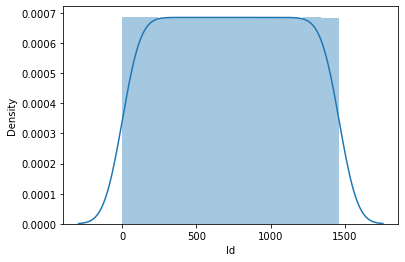

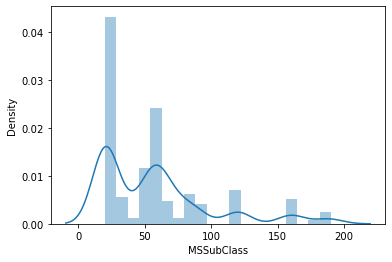

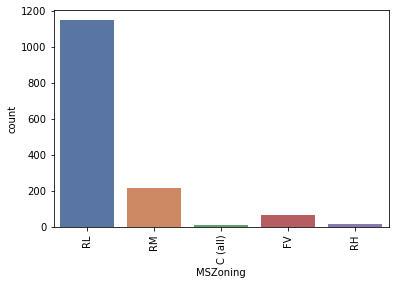

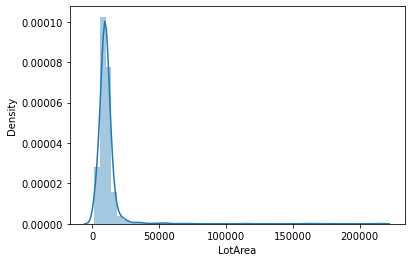

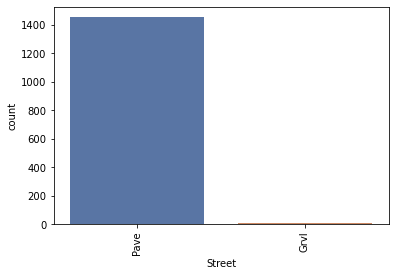

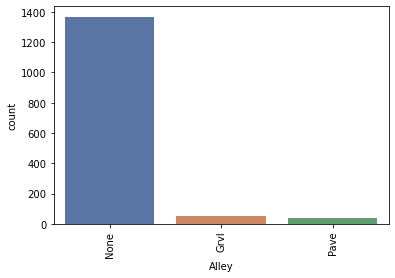

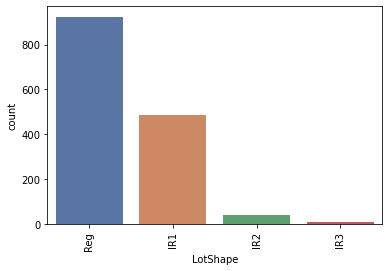

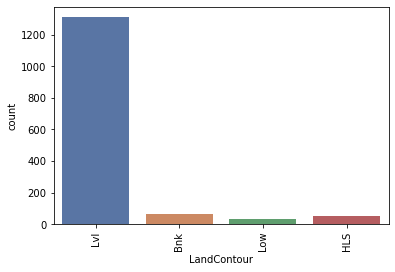

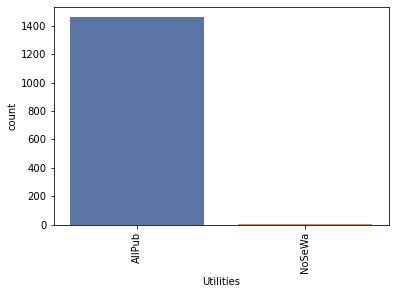

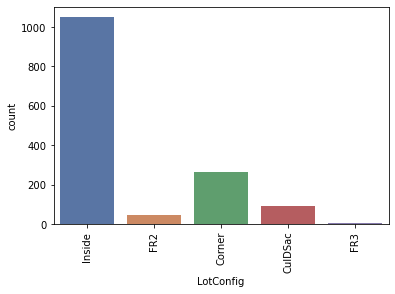

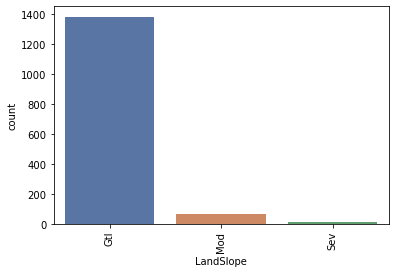

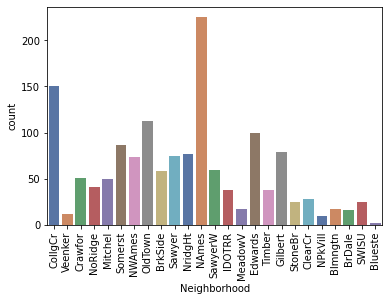

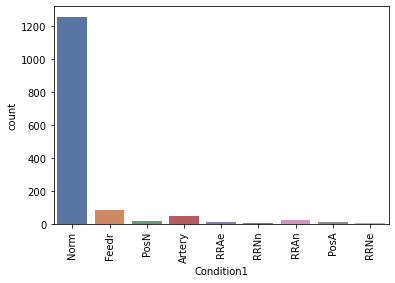

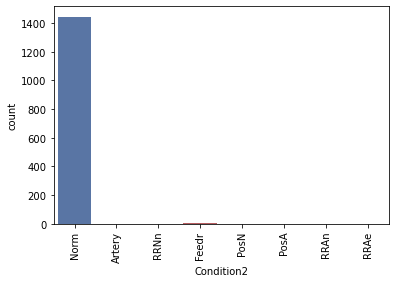

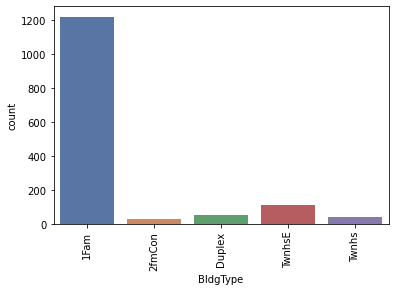

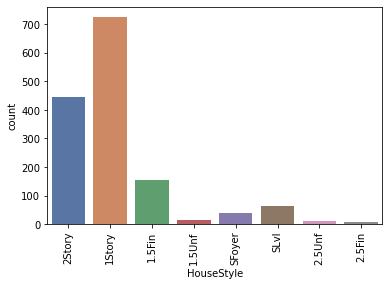

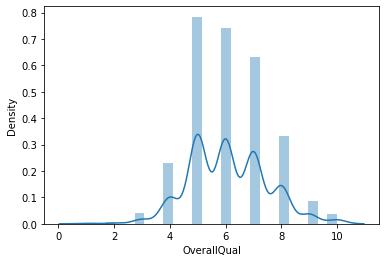

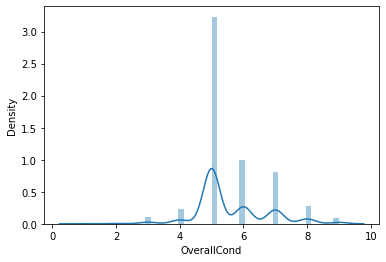

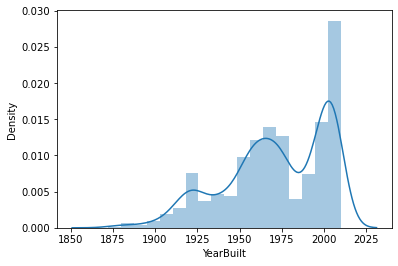

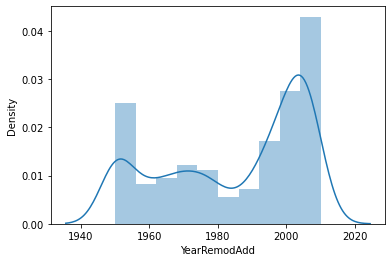

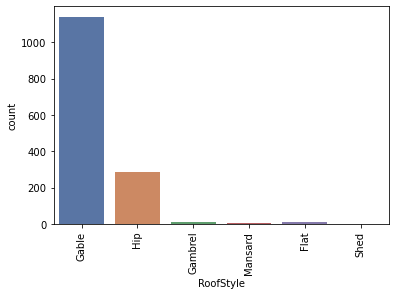

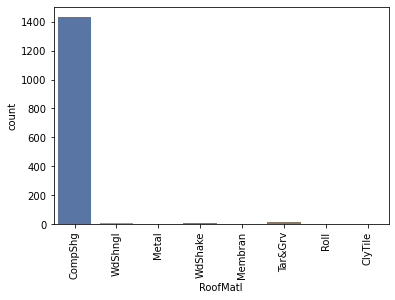

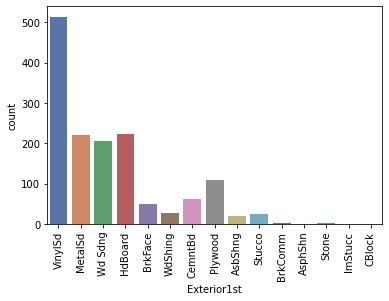

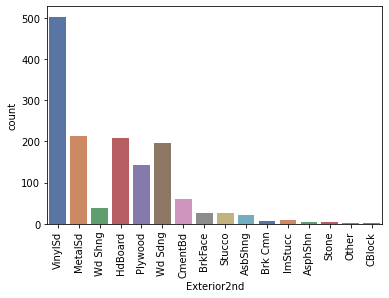

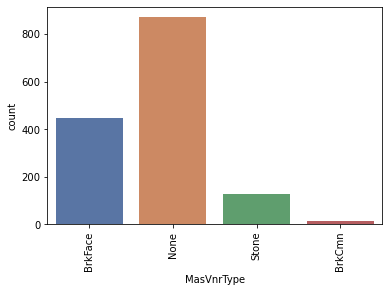

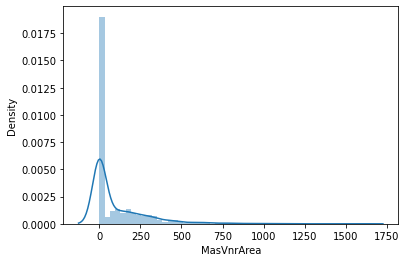

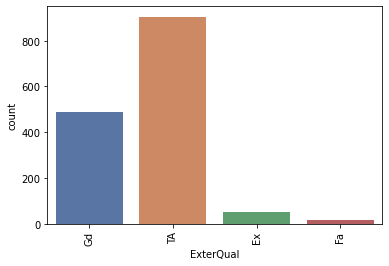

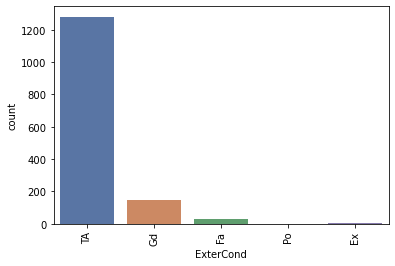

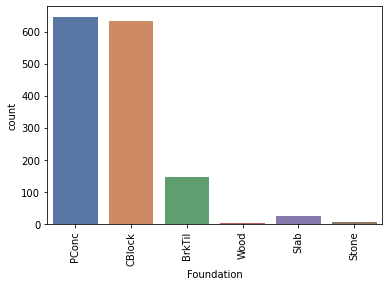

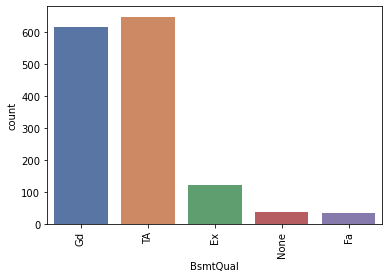

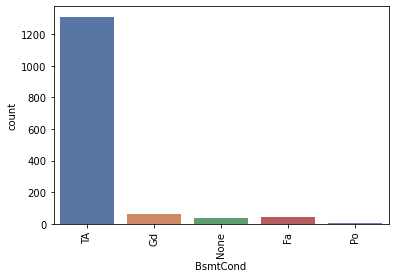

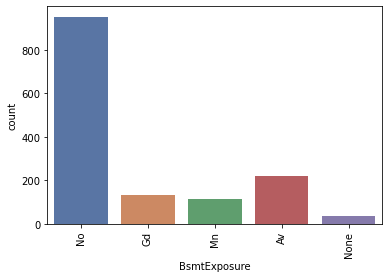

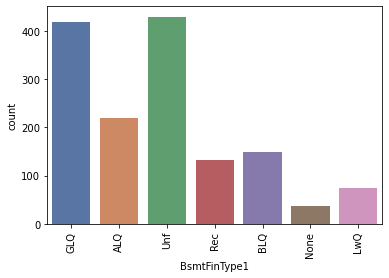

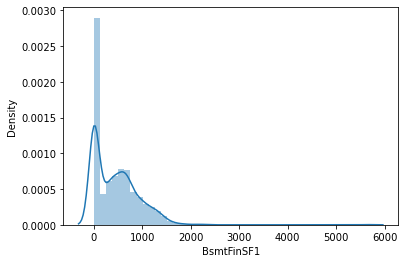

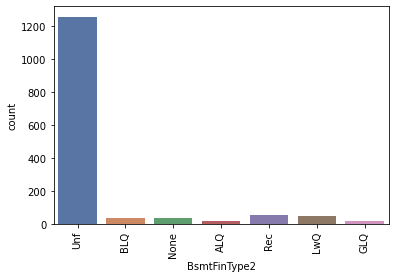

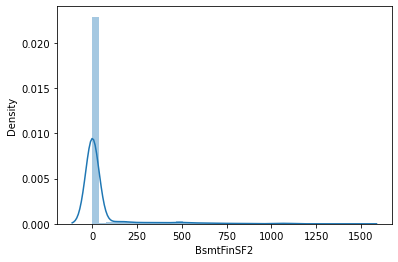

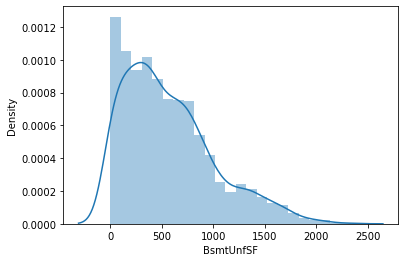

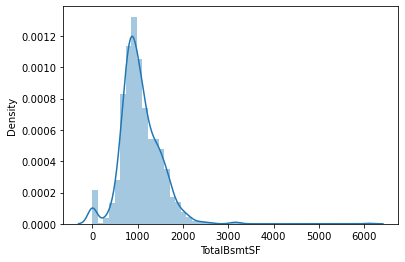

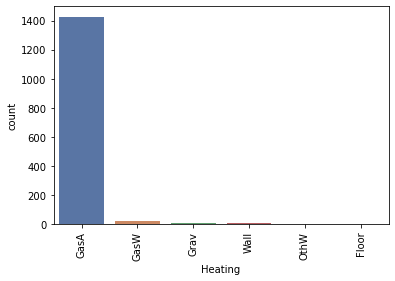

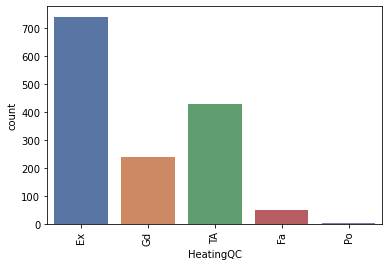

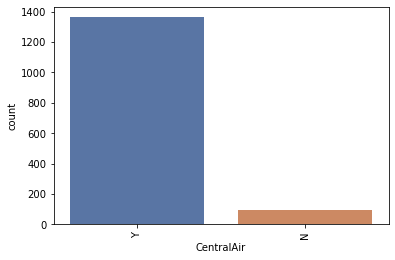

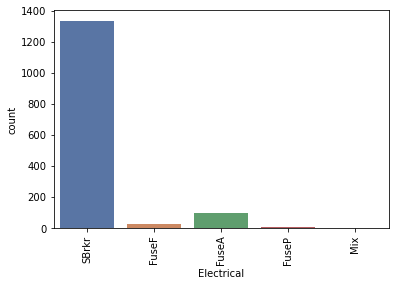

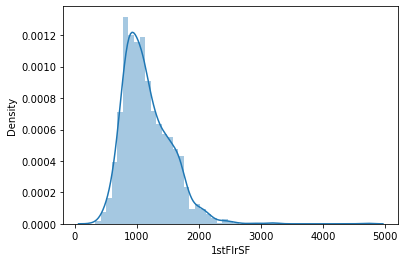

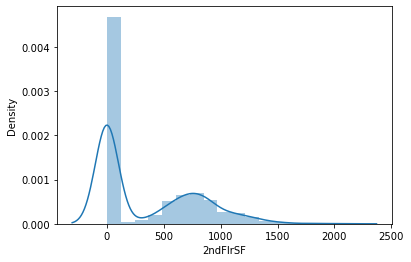

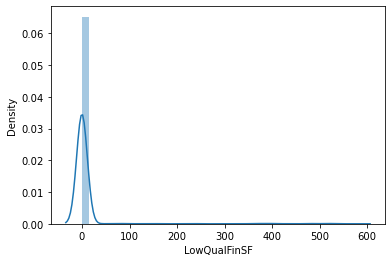

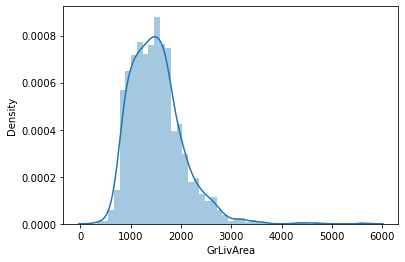

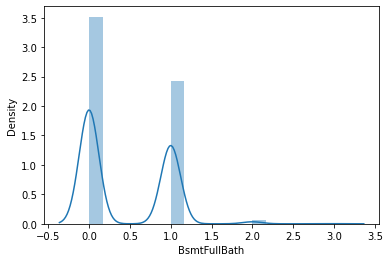

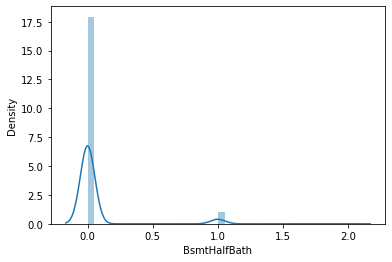

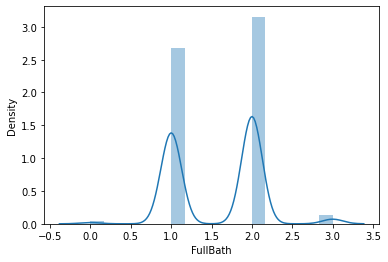

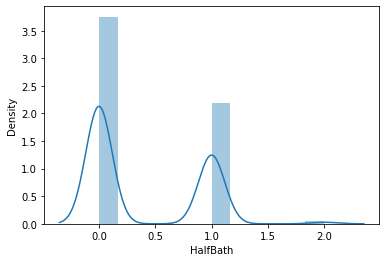

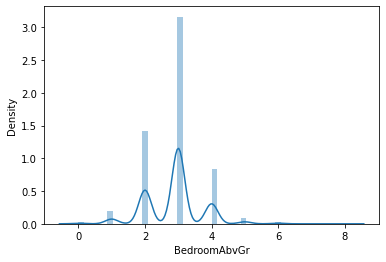

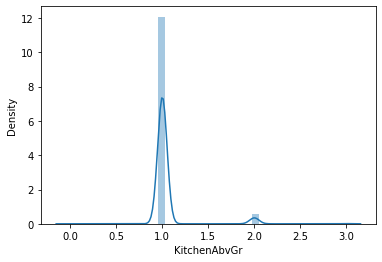

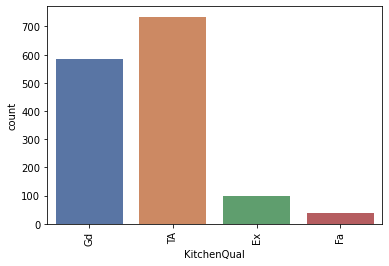

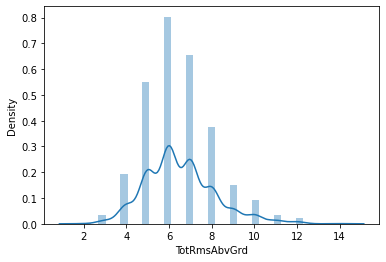

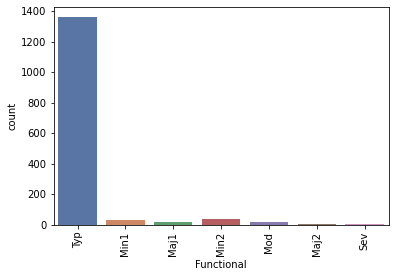

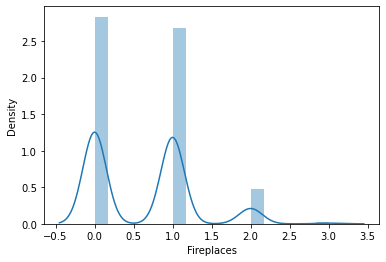

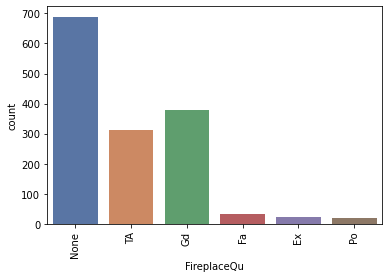

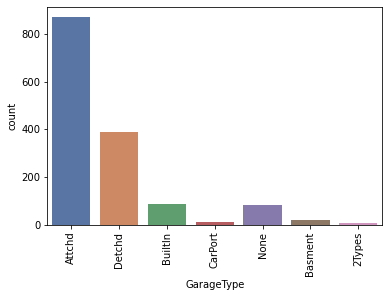

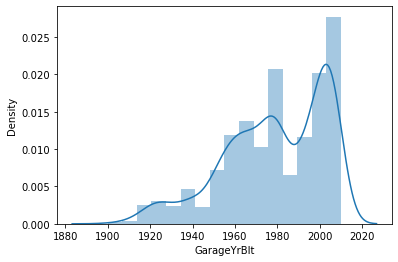

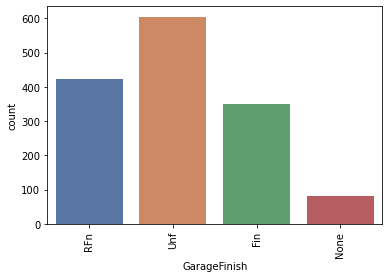

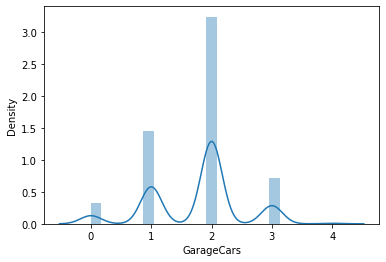

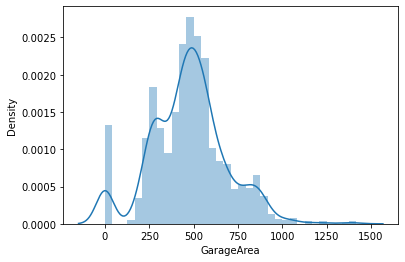

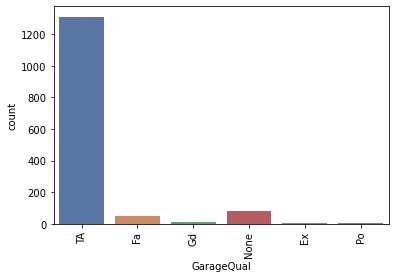

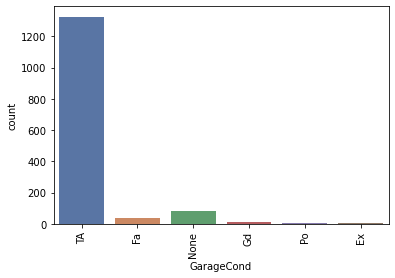

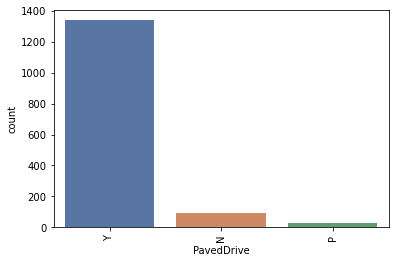

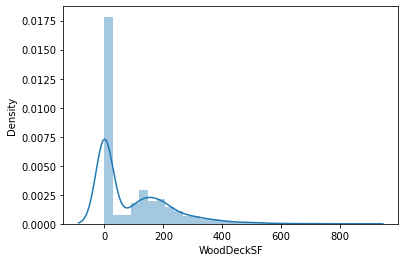

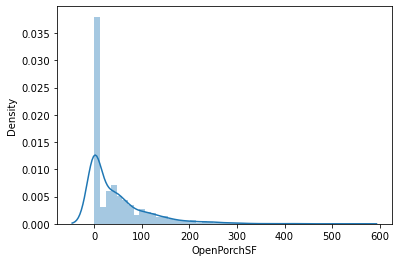

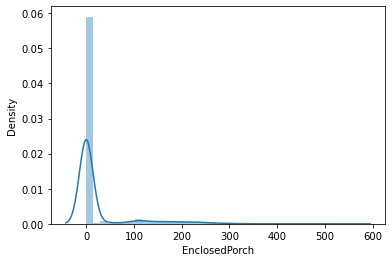

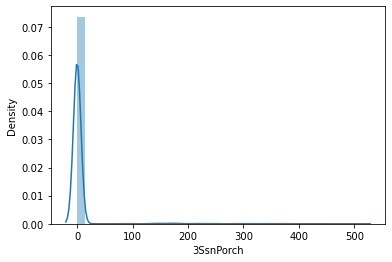

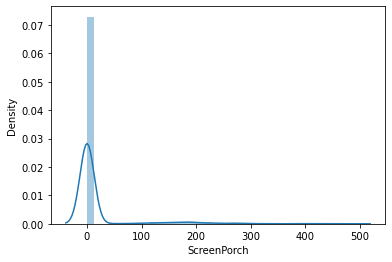

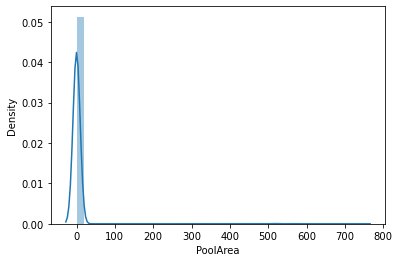

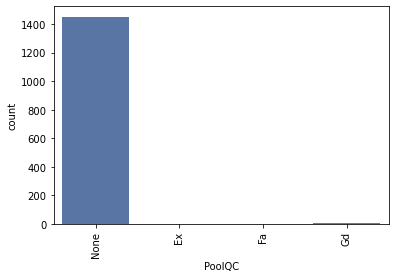

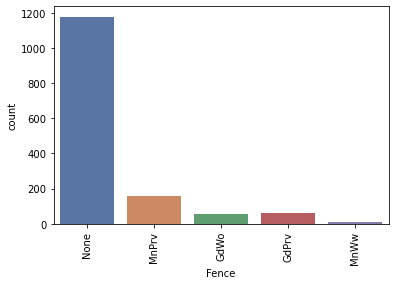

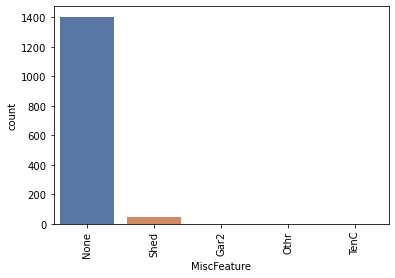

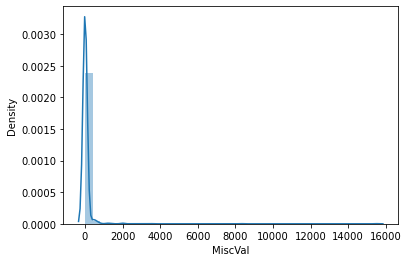

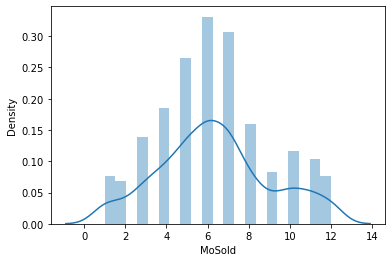

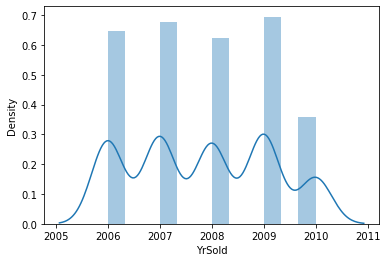

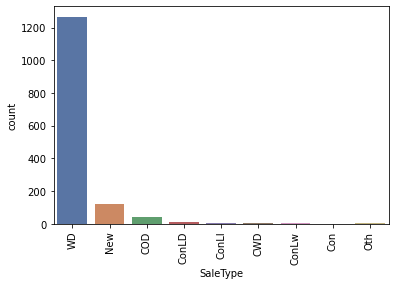

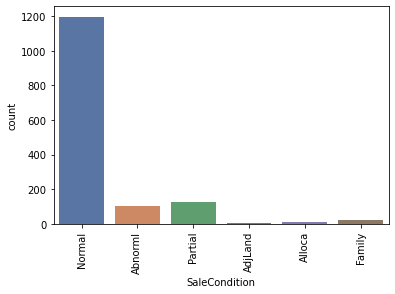

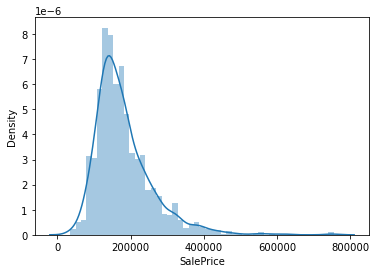

In [25]:
for column in data.columns:
    if column in num_Cols:
        sns.distplot(data[column].dropna())
        plt.show()
    else:
        if column != 'Id':
            sns.countplot(data[column] ,palette="deep")
            plt.xticks(rotation = 90)
            plt.show()

we can see that:
- in MSSubClass the top three types of dwelling involved in  the sale is 1-STORY 1946 & NEWER ALL STYLES,2-STORY 1946 & NEWER
    and 1-1/2 STORY FINISHED ALL AGES
- In the zoning classification the houses for sale are mostly in low density residential zones
- LotFrontage mean is around 60 feet
- lot area is around 10000 to 20000 square feet
- majority are paved streets
- majority has no alley access
- majority are regular shaped properties
- majority house lie on flat areas
- all public utilities are present
- majority of the lot configuration are inside lots
- majority of the house have a gentle slope of property
- North ames is the most common neighbourhood
- normal proximity to various conditions
- single family detached type of dwelling is the most common
- one story style of dwelling is the most common
- majority of the finish of the house is between average and good
- majority overall condition of the house is average
- most of the houses built were in 2000s
- house remodel date is around 2000s again
- most of the house have gable type of roof
- most common roof material used is standard shingle
- most common exterior covering of the house is vinyl sliding
- masonry vaneer area is 0
- exterior quality is average for most of the houses
- exterior condition of the material on exterior is average for most houses
- poured concrete is the most common type of foundation
- height of most the basements are typical(80-89 inches)
- general condition of the basements are average
- most of the basements have no exposure to walkout
- majority of the house have unifinished rating of basement finsihed area
- total basement sq ft is around 1000
- majority houses have gas forced warm air furnace type of heating with excellent heating conditions
- majority of the houses have central air conditioning
- electric systems are standard circuit breakers and romex
- 1st floor square feet is averaging around 1000
- 2nd floor is averaging around 750 sq ft
- above ground living area square feet is around 1500
- kitchen quality ranges from typical to good
- Total rooms above grade is 6 on average
- they all have typical home functionalities
- most of the houses have attached garage 
- most of the houses have paved driveway
- majority house haves no fence
- Most of the house for sale has SaleType as Warranty Deed - Conventional
- Most of the house for sale has SaleCondition as Normal
- Most of the house for sale has SalePrice mean around 120000


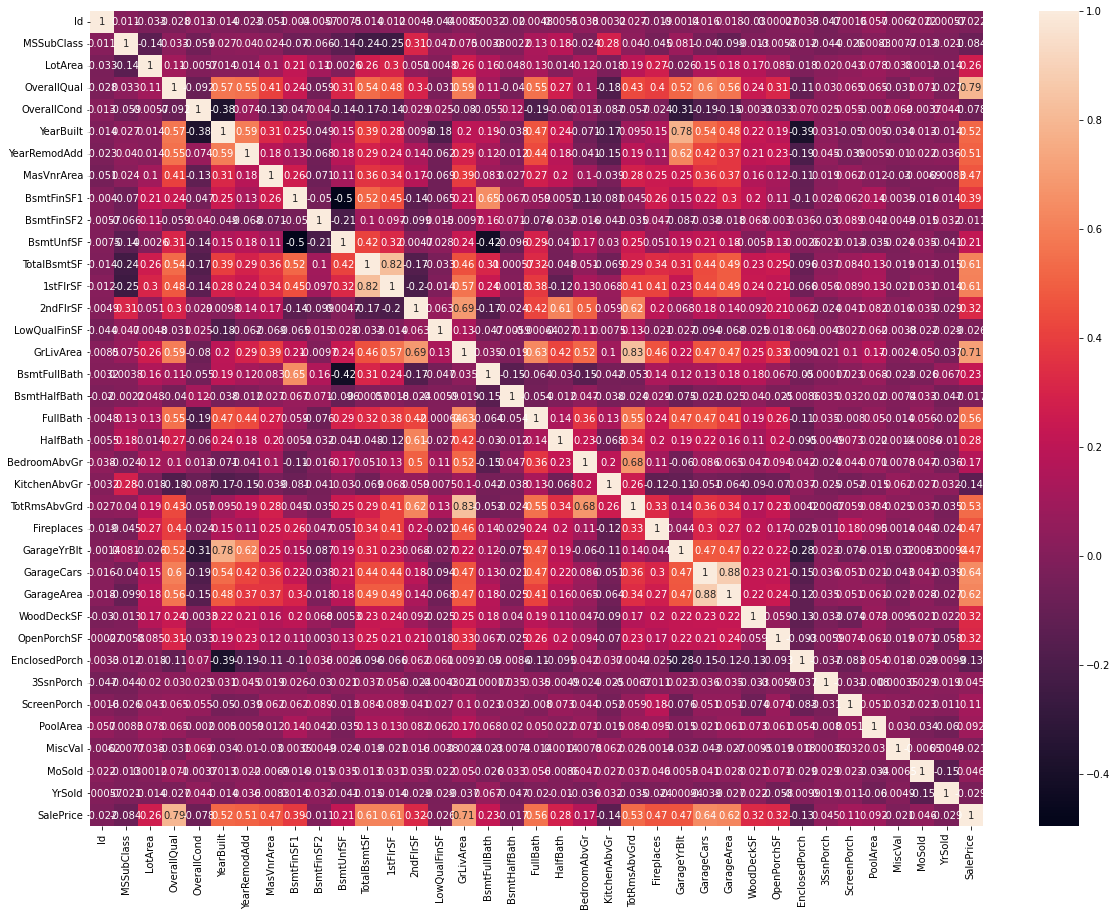

In [26]:
# check correlation between the different vars

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

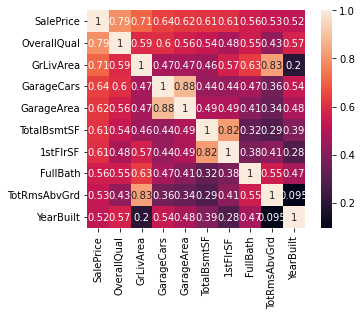

In [27]:
#check top 10 vars in correlation with SalesPrice

k = 10
cols = data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
corrm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(corrm, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

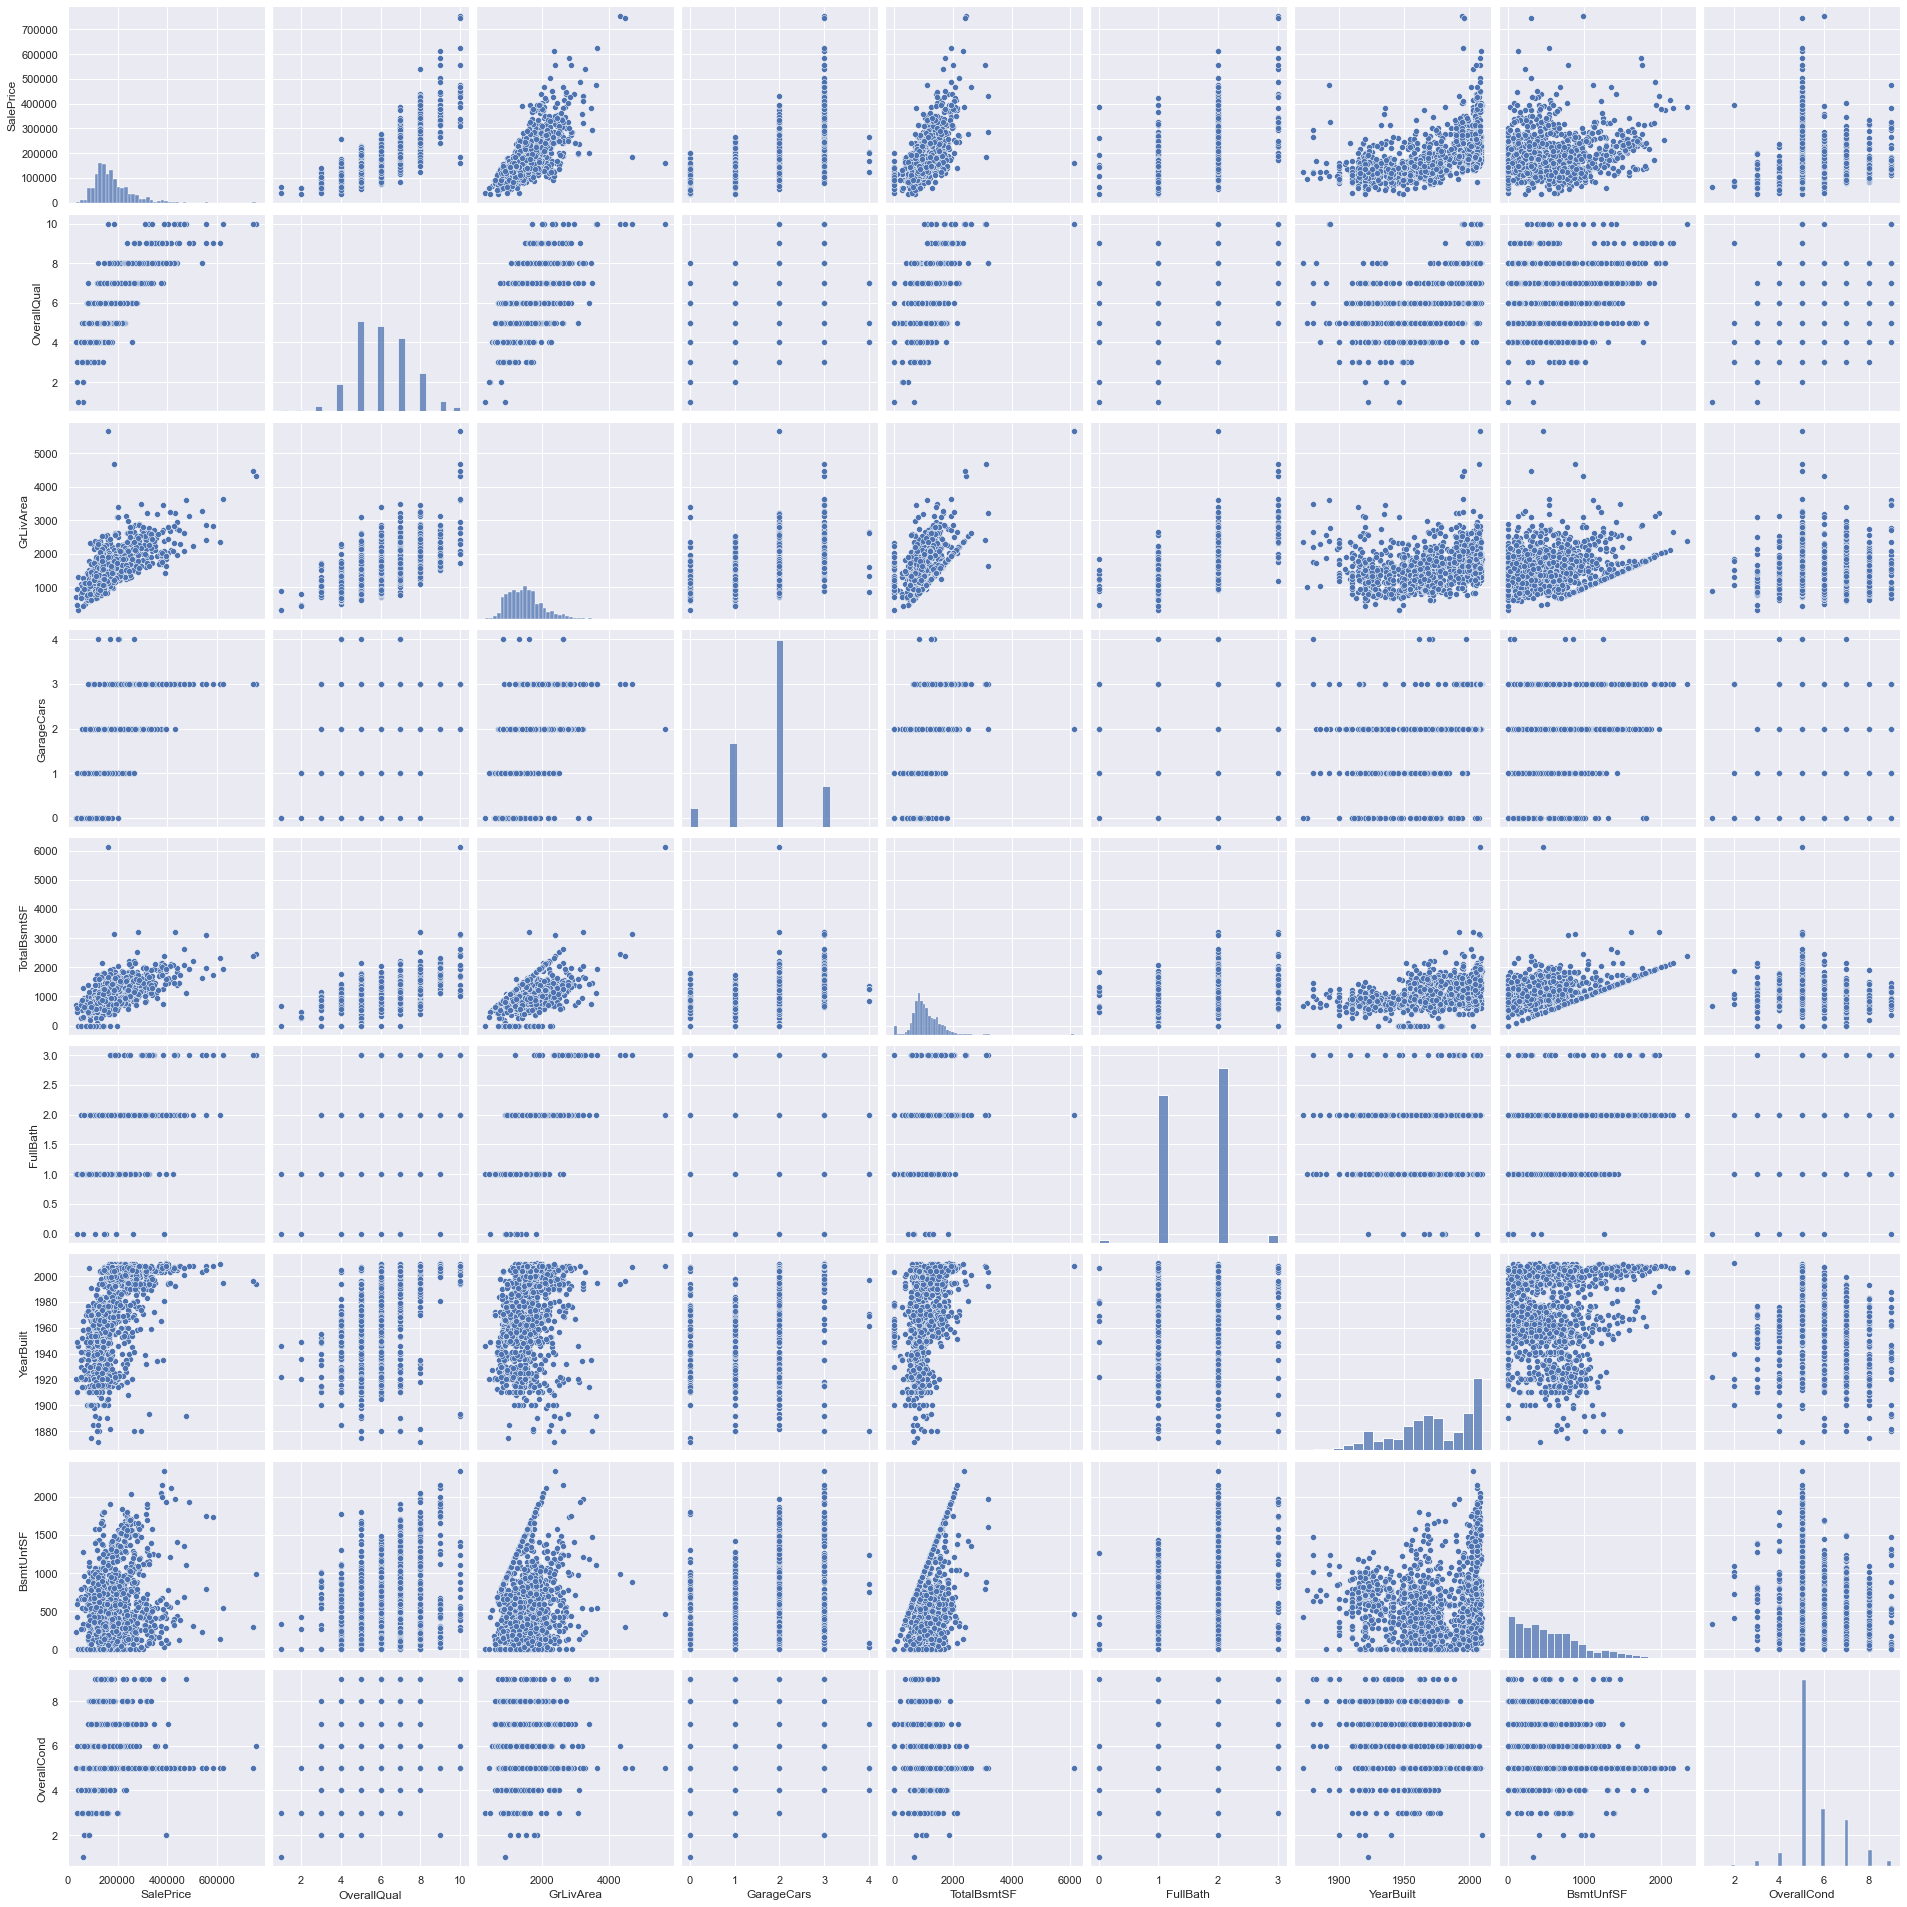

In [28]:
#scatterplot for correlated cols

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','BsmtUnfSF','OverallCond']
sns.pairplot(data[cols], size = 3)
plt.show();

## Data Preparation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

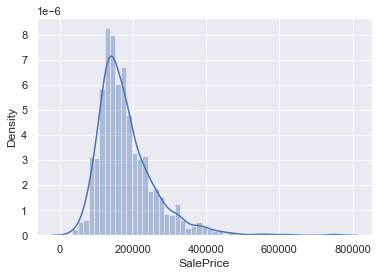

In [29]:
sns.distplot(data["SalePrice"])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [31]:
print(cat_Cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### create dummies

In [32]:
# Convert categorical variables to numeric variables

houseprice_data = pd.get_dummies(columns=[i for i in cat_Cols if i != 'Id'], data=data, prefix=[i for i in cat_Cols if i != 'Id'], prefix_sep='_', drop_first=True)


In [33]:
cols = houseprice_data.columns
print(list(cols))

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_None', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_E

# Model Building

## Train / Test split


In [34]:
# Splitting into Train and Test

X_train, X_test, y_train, y_test = train_test_split(houseprice_data.drop(['Id','SalePrice'], axis = 1),houseprice_data['SalePrice'], test_size=0.33, random_state=42)

In [35]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_F

In [36]:
print(num_Cols)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [37]:
#scaling numeric features and exclude ID and SalePrice

num_vars=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
          'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
          'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
          'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
          '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


In [38]:
X_train[num_vars].columns = num_vars
X_test[num_vars].columns = num_vars

In [39]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_F

# Ridge Regression

In [40]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010776,0.001723,0.003990,0.000893,0.0001,{'alpha': 0.0001},-22301.780814,-20656.044899,-25050.373325,-19246.717008,-21803.834831,-21811.750175,1931.006081,28,-11403.779731,-12025.130260,-11252.731888,-12408.037117,-12391.686193,-11896.273038,485.929155
1,0.007781,0.000396,0.002991,0.000002,0.001,{'alpha': 0.001},-22258.476219,-20645.582335,-24973.135318,-19239.153639,-21789.937383,-21781.256979,1906.197638,27,-11405.211469,-12028.661425,-11255.993836,-12416.111813,-12396.613003,-11900.518309,487.669545
2,0.008770,0.002223,0.003203,0.001176,0.01,{'alpha': 0.01},-21949.201032,-20541.146214,-24309.822792,-19189.128539,-21673.700987,-21532.599913,1695.952325,26,-11438.966051,-12061.650168,-11313.143838,-12503.538659,-12443.217586,-11952.103260,495.752709
3,0.007786,0.001607,0.003190,0.000398,0.05,{'alpha': 0.05},-21218.211424,-20172.730266,-22962.700521,-19384.927274,-21416.592965,-21031.032490,1213.373751,24,-11826.297515,-12172.202022,-11715.786829,-12912.477874,-12619.798293,-12249.312507,457.511832
4,0.007381,0.001850,0.003191,0.000398,0.1,{'alpha': 0.1},-20791.341532,-19951.291735,-22183.494100,-19722.771051,-21306.963220,-20791.172328,900.164528,23,-12233.399424,-12267.881154,-12141.499474,-13263.957939,-12803.475908,-12542.042780,429.038235


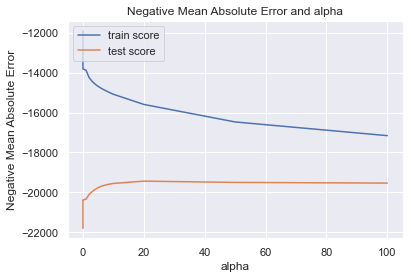

In [42]:
# plotting mean test and train scoes with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [43]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=15)

In [44]:
#Top positive coefficients of vars

coef_table = pd.DataFrame([X_train.columns, ridge.coef_]).T
coef_table.columns = ['column_name','coef_value']
coef_table.sort_values('coef_value', ascending = False).iloc[:10,:]

,column_name,coef_value
70,Neighborhood_NridgHt,25109.501611
76,Neighborhood_StoneBr,21855.444231
69,Neighborhood_NoRidge,16841.89081
2,OverallQual,15203.047853
119,Exterior1st_BrkFace,13459.638651
169,BsmtExposure_Gd,13384.627895
21,TotRmsAbvGrd,12653.124265
60,Neighborhood_Crawfor,11583.719676
254,SaleCondition_Alloca,10911.726862
88,Condition2_Norm,10765.736803


In [45]:
#Top negative coefficients of vars


coef_table.sort_values('coef_value', ascending = True).iloc[:10,:]

,column_name,coef_value
201,KitchenQual_TA,-15258.84348
200,KitchenQual_Gd,-14475.687808
90,Condition2_PosN,-14364.042649
61,Neighborhood_Edwards,-13454.582148
151,ExterQual_TA,-12222.222133
164,BsmtQual_TA,-11995.898154
162,BsmtQual_Gd,-11828.84866
62,Neighborhood_Gilbert,-9139.738322
150,ExterQual_Gd,-8874.260406
235,PoolQC_Gd,-8731.290049


In [46]:
#lowest abs values

coef_table['coef_value'] =  np.abs(coef_table['coef_value'])
coef_table.sort_values('coef_value', ascending = True).iloc[:10,:]

,column_name,coef_value
118,Exterior1st_BrkComm,0.0
89,Condition2_PosA,0.0
123,Exterior1st_ImStucc,0.0
197,Electrical_Mix,0.0
111,RoofMatl_Membran,0.0
93,Condition2_RRNn,0.0
44,LotShape_Reg,0.20522
54,LandSlope_Sev,57.33893
115,RoofMatl_WdShake,68.432967
132,Exterior2nd_Brk Cmn,75.424797


In [47]:
#highest abs coeff

oef_table['coef_value'] =  np.abs(coef_table['coef_value'])
coef_table.sort_values('coef_value', ascending = False).iloc[:10,:]

,column_name,coef_value
70,Neighborhood_NridgHt,25109.501611
76,Neighborhood_StoneBr,21855.444231
69,Neighborhood_NoRidge,16841.89081
201,KitchenQual_TA,15258.84348
2,OverallQual,15203.047853
200,KitchenQual_Gd,14475.687808
90,Condition2_PosN,14364.042649
119,Exterior1st_BrkFace,13459.638651
61,Neighborhood_Edwards,13454.582148
169,BsmtExposure_Gd,13384.627895


In [48]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [49]:
print('The Mean absolute error on train data: {} \n'.format(mean_absolute_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute error on test data: {} \n'.format(mean_absolute_error(y_pred = y_test_pred, y_true = y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The Mean absolute percentage error on train data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute percentage error on test data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_test_pred, y_true = y_test)))

print('The R2 Score on train data: {} \n'.format(r2_score(y_pred = y_train_pred, y_true = y_train)))
print('The R2 Score on test data: {} \n'.format(r2_score(y_pred = y_test_pred, y_true = y_test)))

The Mean absolute error on train data: 15666.473895898567 

The Mean absolute error on test data: 19385.791596026116 

The Mean absolute percentage error on train data: 9.119890585034424 

The Mean absolute percentage error on test data: 11.35892307878461 

The R2 Score on train data: 0.8891802311364037 

The R2 Score on test data: 0.843987123103096 



Observations made

Top 5 positive correlated variables are

- Neighborhood_NridgHt	
- Neighborhood_StoneBr	
- Neighborhood_NoRidge	
- OverallQual	
- Exterior1st_BrkFace

Top 5 negative correlated variables are

- KitchenQual_TA	
- KitchenQual_Gd	
- Condition2_PosN	
- Neighborhood_Edwards	
- ExterQual_TA	


# Lasso Regression

In [50]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128437,0.016956,0.004197,0.000984,0.0001,{'alpha': 0.0001},-23699.644016,-20714.283071,-24315.594737,-20562.205689,-22488.617256,-22356.068954,1521.572252,28,-11410.606468,-12030.213433,-11247.861057,-12423.136606,-12401.961227,-11902.755758,491.395112
1,0.138752,0.018453,0.043728,0.079979,0.001,{'alpha': 0.001},-23692.333105,-20714.635115,-24314.129135,-20561.793981,-22487.397691,-22354.057805,1519.905016,27,-11410.597575,-12030.224786,-11247.888272,-12423.137507,-12401.976127,-11902.764853,491.393446
2,0.117288,0.010101,0.003790,0.000977,0.01,{'alpha': 0.01},-23619.143216,-20718.108283,-24299.497631,-20557.234542,-22475.181925,-22333.833119,1503.509744,26,-11410.726809,-12030.492150,-11248.215949,-12423.348038,-12402.194966,-11902.995582,491.383148
3,0.129716,0.021737,0.003591,0.001017,0.05,{'alpha': 0.05},-23298.945579,-20742.954611,-24232.150556,-20540.239650,-22513.499185,-22265.557916,1434.705230,25,-11411.398625,-12031.676507,-11249.718575,-12424.393822,-12403.391616,-11904.115829,491.374244
4,0.114410,0.008865,0.003192,0.000399,0.1,{'alpha': 0.1},-23240.800612,-20760.189863,-24146.654980,-20518.127251,-22523.074416,-22237.769424,1405.113884,24,-11412.893208,-12033.194451,-11251.738411,-12425.656727,-12405.089415,-11905.714442,491.227832


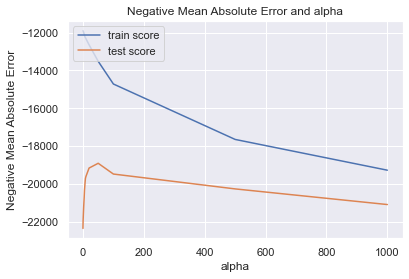

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [53]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [54]:
#Top positive coefficients of vars


coef_table = pd.DataFrame([X_train.columns, lasso.coef_]).T
coef_table.columns = ['column_name','coef_value']
coef_table.sort_values('coef_value', ascending = False).iloc[:10,:]

,column_name,coef_value
76,Neighborhood_StoneBr,43579.724619
70,Neighborhood_NridgHt,39342.51827
69,Neighborhood_NoRidge,33232.311005
254,SaleCondition_Alloca,31319.860023
119,Exterior1st_BrkFace,23598.181627
60,Neighborhood_Crawfor,20167.110437
169,BsmtExposure_Gd,17060.664126
116,RoofMatl_WdShngl,16975.447269
257,SaleCondition_Partial,15748.227829
75,Neighborhood_Somerst,14216.986762


In [55]:
#Top negative coefficients of vars


coef_table.sort_values('coef_value', ascending = True).iloc[:10,:]

,column_name,coef_value
90,Condition2_PosN,-91482.195407
235,PoolQC_Gd,-90179.235292
201,KitchenQual_TA,-23417.732347
200,KitchenQual_Gd,-21310.867726
199,KitchenQual_Fa,-14030.206363
151,ExterQual_TA,-13224.897484
162,BsmtQual_Gd,-11601.832245
222,GarageQual_Fa,-11236.856967
164,BsmtQual_TA,-11222.736987
150,ExterQual_Gd,-11123.42642


In [56]:
#lowest abs values

coef_table['coef_value'] =  np.abs(coef_table['coef_value'])
coef_table.sort_values('coef_value', ascending = True).iloc[:10,:]

,column_name,coef_value
128,Exterior1st_VinylSd,0.0
132,Exterior2nd_Brk Cmn,0.0
133,Exterior2nd_BrkFace,0.0
134,Exterior2nd_CBlock,0.0
135,Exterior2nd_CmentBd,0.0
137,Exterior2nd_ImStucc,0.0
138,Exterior2nd_MetalSd,0.0
139,Exterior2nd_Other,0.0
141,Exterior2nd_Stone,0.0
144,Exterior2nd_Wd Sdng,0.0


In [57]:
#highest abs coeff

coef_table['coef_value'] =  np.abs(coef_table['coef_value'])
coef_table.sort_values('coef_value', ascending = False).iloc[:10,:]

,column_name,coef_value
90,Condition2_PosN,91482.195407
235,PoolQC_Gd,90179.235292
76,Neighborhood_StoneBr,43579.724619
70,Neighborhood_NridgHt,39342.51827
69,Neighborhood_NoRidge,33232.311005
254,SaleCondition_Alloca,31319.860023
119,Exterior1st_BrkFace,23598.181627
201,KitchenQual_TA,23417.732347
200,KitchenQual_Gd,21310.867726
60,Neighborhood_Crawfor,20167.110437


In [58]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [59]:
print('The Mean absolute error on train data: {} \n'.format(mean_absolute_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute error on test data: {} \n'.format(mean_absolute_error(y_pred = y_test_pred, y_true = y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The Mean absolute percentage error on train data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_train_pred, y_true = y_train)))
print('The Mean absolute percentage error on test data: {} \n'.format(mean_absolute_percentage_error(y_pred = y_test_pred, y_true = y_test)))

print('The R2 Score on train data: {} \n'.format(r2_score(y_pred = y_train_pred, y_true = y_train)))
print('The R2 Score on test data: {} \n'.format(r2_score(y_pred = y_test_pred, y_true = y_test)))

The Mean absolute error on train data: 15451.30449284509 

The Mean absolute error on test data: 19019.736362143994 

The Mean absolute percentage error on train data: 8.972744702882517 

The Mean absolute percentage error on test data: 11.35479007632463 

The R2 Score on train data: 0.8984120767005956 

The R2 Score on test data: 0.8575995002499502 



observations made are

Top 5 positive correlated variables are

- Neighborhood_StoneBr	
- Neighborhood_NridgHt	
- Neighborhood_NoRidge	
- SaleCondition_Alloca	
- Exterior1st_BrkFace	

Top 5 negative correlated variables are

- Condition2_PosN	
- PoolQC_Gd	
- KitchenQual_TA
- KitchenQual_Gd	
- KitchenQual_Fa	

### Lasso regression is slightly better than ridge when seeing the R2 and the difference between train and test data